# 商业智能与推荐系统

## Use LeNet model to recognize Mnist handwritten digits

In [5]:
import tensorflow as tf
#print(tf.__version__)
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
import numpy as np

import os
import warnings
warnings.filterwarnings('ignore')
path = os.path.expanduser('~/data/')

In [6]:
# 数据加载
#(train_x, train_y), (test_x, test_y) = mnist.load_data() #从网上下载数据集
data = np.load(path+ '/course_data/mnist.npz') #从本地读取数据集
#print(data.files)
train_x, train_y, test_x, test_y  = data['x_train'], data['y_train'], data['x_test'], data['y_test']

In [7]:
# 输入数据为 mnist 数据集
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
train_x = train_x / 255
test_x = test_x / 255
train_y = tf.keras.utils.to_categorical(train_y, 10)
test_y = tf.keras.utils.to_categorical(test_y, 10)

In [12]:
# 创建序贯模型
model = Sequential()
# 第一层卷积层：6个卷积核，大小为5∗5, relu激活函数
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
# 第二层池化层：最大池化
model.add(MaxPooling2D(pool_size=(2, 2)))
# 第三层卷积层：16个卷积核，大小为5*5，relu激活函数
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# 第二层池化层：最大池化
model.add(MaxPooling2D(pool_size=(2, 2)))
# 将参数进行扁平化，在LeNet5中称之为卷积层，实际上这一层是一维向量，和全连接层一样
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# 全连接层，输出节点个数为84个
model.add(Dense(84, activation='relu'))
# 输出层 用softmax 激活函数计算分类概率
model.add(Dense(10, activation='softmax'))
# 设置损失函数和优化器配置
model.compile(loss=tf.keras.metrics.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
# 传入训练数据进行训练
model.fit(train_x, train_y, batch_size=128, epochs=2, verbose=1, validation_data=(test_x, test_y))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 38s 638us/sample - loss: 0.3487 - acc: 0.8927 - val_loss: 0.1011 - val_acc: 0.9703
Epoch 2/2
60000/60000 [==============================] - 40s 661us/sample - loss: 0.0905 - acc: 0.9721 - val_loss: 0.0901 - val_acc: 0.9711


In [13]:
# 对结果进行评估
score = model.evaluate(test_x, test_y)
print('误差:%0.4lf' %score[0])
print('准确率:', score[1])

10000/10000 [==============================] - 3s 321us/sample - loss: 0.0901 - acc: 0.9711
误差:0.0901
准确率: 0.9711


## 使用LR进行MNIST手写数字分类

In [14]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [15]:
# 加载数据
digits = load_digits()
data = digits.data
# 数据探索
print(data.shape)
# 查看第一幅图像
print(digits.images[0])
# 第一幅图像代表的数字含义
print(digits.target[0])

(1797, 64)
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
0


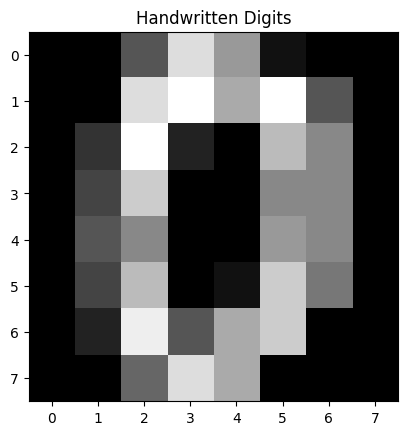

In [16]:
# 将第一幅图像显示出来
plt.gray()
plt.title('Handwritten Digits')
plt.imshow(digits.images[0])
plt.show()

In [17]:
# 分割数据，将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

In [18]:
# 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

In [19]:
# 创建LR分类器
lr = LogisticRegression()
lr.fit(train_ss_x, train_y)
predict_y=lr.predict(test_ss_x)
print('LR准确率: %0.4lf' % accuracy_score(predict_y, test_y))

LR准确率: 0.9644
